In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import scipy.stats as st
import RELACS as rel
sns.set_style("white")
sns.set_context("paper")
%load_ext rpy2.ipython
%matplotlib inline

/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# NPC48h

In [2]:
exp_de_npc = pd.read_csv("../INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_NPC48h_EPZvsDMSO.tsv", sep="\t")
exp_de_npc_up = exp_de_npc.loc[(exp_de_npc.padj<0.05)&(exp_de_npc.log2FoldChange>0)].index
exp_de_npc_down = exp_de_npc.loc[(exp_de_npc.padj<0.05)&(exp_de_npc.log2FoldChange<0)].index

In [3]:
peaks_npc = pd.read_csv("../INTERMEDIATE_FILES/NPC48h_DIFF_H3K4me3/REFERENCE_TABLE_H3K4me3.bed",sep="\t")
de_peaks_npc = pd.read_csv("../INTERMEDIATE_FILES/NPC48h_DIFF_H3K4me3/resLFC_normal.tsv",sep="\t")
de_peaks_npc.columns = ["{}_normal".format(i) for i in list(de_peaks_npc)]
de_peaks_npc = de_peaks_npc[["log2FoldChange_normal"]]
df = peaks_npc.merge(de_peaks_npc, how='right',left_on="peakID", right_index=True)
df = df.loc[df.Annotation_homer == "promoter-TSS"]
df.index = df.homer_genes
df

,chr,start,end,peakID,baseMean,log2FoldChange,pvalue,padj,geneID,symbol,Annotation_homer,homer_genes,log2FoldChange_normal
homer_genes,,,,,,,,,,,,,
ENSMUSG00000026317.7,8,14887612,14890165,8_14887612_14890165,551.420489,1.041062e-07,0.514353,0.999963,ENSMUSG00000026317.7,Cln8,promoter-TSS,ENSMUSG00000026317.7,-0.057779
ENSMUSG00000042557.14,9,57071682,57077762,9_57071682_57077762,1158.741034,-5.628506e-07,0.564213,0.999963,ENSMUSG00000042557.14,Sin3a,promoter-TSS,ENSMUSG00000042557.14,0.049903
ENSMUSG00000042557.14,9,57071682,57077762,9_57071682_57077762,1158.741034,-5.628506e-07,0.564213,0.999963,ENSMUSG00000097334.1,2700012I20Rik,promoter-TSS,ENSMUSG00000042557.14,0.049903
ENSMUSG00000041264.16,5,149184608,149185918,5_149184608_149185918,213.329942,3.738025e-06,0.350299,0.999963,ENSMUSG00000097191.2,RP23-408A1.3,promoter-TSS,ENSMUSG00000041264.16,0.077568
ENSMUSG00000041264.16,5,149184608,149185918,5_149184608_149185918,213.329942,3.738025e-06,0.350299,0.999963,ENSMUSG00000066551.12,Hmgb1,promoter-TSS,ENSMUSG00000041264.16,0.077568
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000018286.6,11,70524830,70526265,11_70524830_70526265,140.250844,9.669860e-07,0.772237,0.999963,ENSMUSG00000018286.6,Psmb6,promoter-TSS,ENSMUSG00000018286.6,0.022685
ENSMUSG00000074872.2,2,125135806,125136831,2_125135806_125136831,44.553351,1.525730e-06,0.406996,0.999963,ENSMUSG00000074872.2,Ctxn2,promoter-TSS,ENSMUSG00000074872.2,0.047388
ENSMUSG00000026283.13,1,93802805,93805080,1_93802805_93805080,363.978030,1.211425e-06,0.862909,0.999963,ENSMUSG00000026283.13,Ing5,promoter-TSS,ENSMUSG00000026283.13,-0.014759


/package/anaconda3/bin/ipython:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
/package/anaconda3/bin/ipython:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  sys.exit(IPython.start_ipython())


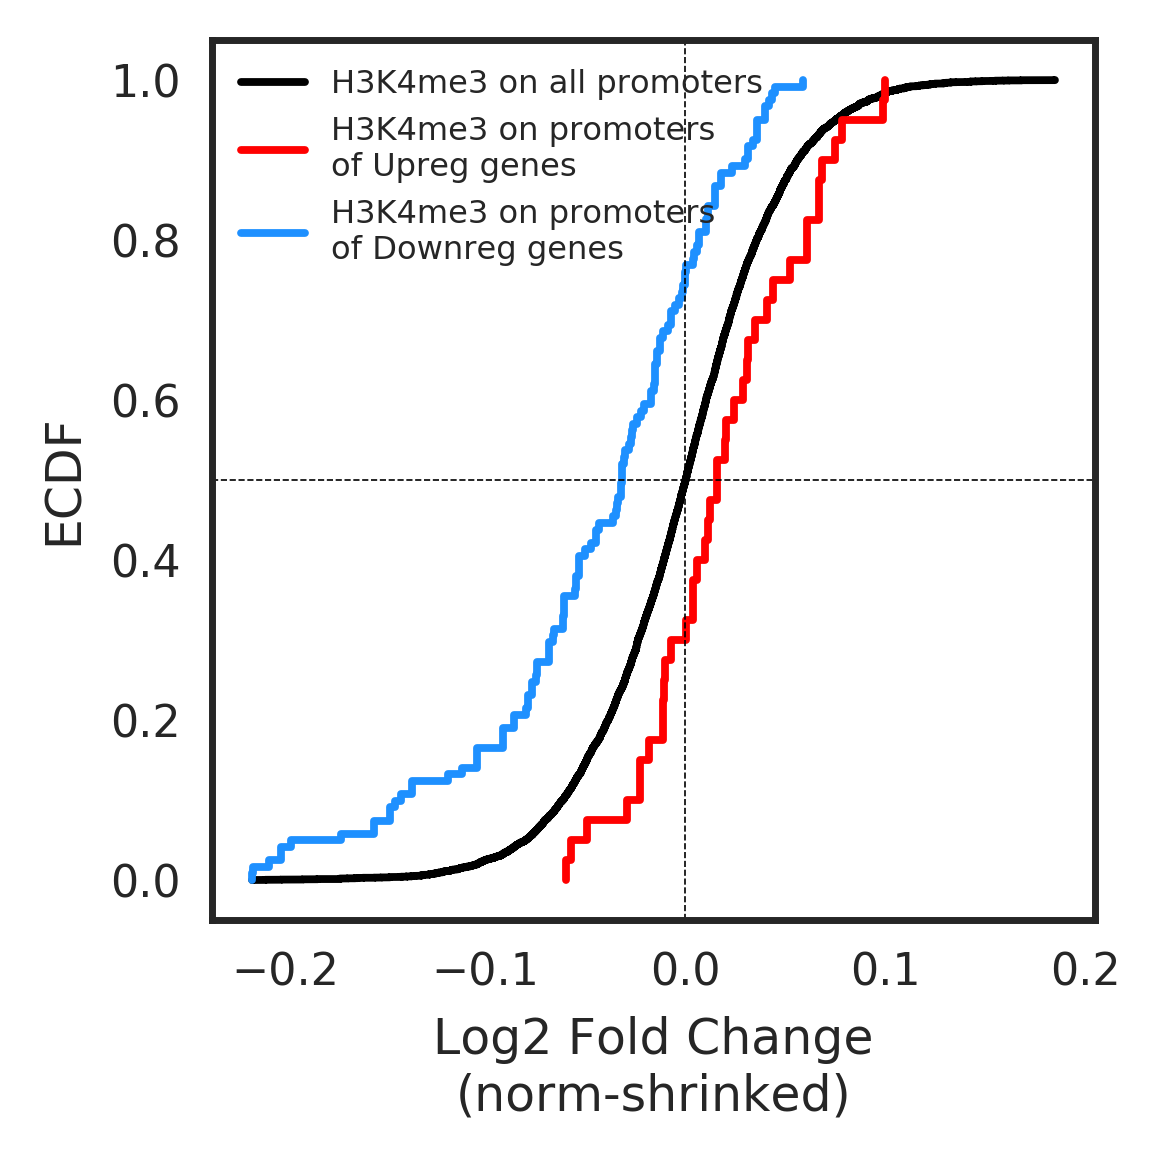

In [4]:
### with cumulative distributions
plt.figure(dpi=400,figsize=(3,3))

data = df.log2FoldChange_normal.dropna()
data_2 = df.log2FoldChange_normal.loc[exp_de_npc_up].dropna()
data_3 = df.log2FoldChange_normal.loc[exp_de_npc_down].dropna()

levels = np.linspace(0, 1, len(data) + 1)  # endpoint 1 is included by default
levels_2 = np.linspace(0, 1, len(data_2) + 1)
levels_3 = np.linspace(0, 1, len(data_3) + 1)

plt.step(sorted(list(data) + [max(data)]), levels, color="k", label = "H3K4me3 on all promoters")
plt.step(sorted(list(data_2) + [max(data_2)]), levels_2, color="r", label = "H3K4me3 on promoters\nof Upreg genes")
plt.step(sorted(list(data_3) + [max(data_3)]), levels_3, color="dodgerblue", label = "H3K4me3 on promoters\nof Downreg genes")
plt.axhline(0.5, linestyle='--',linewidth=0.3,color='k')
plt.axvline(0,linestyle='--',linewidth=0.3,color='k')
plt.legend(fontsize="xx-small")
# plt.title("H3K4me3")
plt.xlabel("Log2 Fold Change\n(norm-shrinked)")
plt.ylabel("ECDF")
plt.tight_layout()

plt.savefig("../FIGURES/H3K4me3_ECDF_NPC48h.png")

In [5]:
peaks_npc = pd.read_csv("../INTERMEDIATE_FILES/NPC48h_DIFF_H3K27ac/REFERENCE_TABLE_H3K27ac.bed",sep="\t")
de_peaks_npc = pd.read_csv("../INTERMEDIATE_FILES/NPC48h_DIFF_H3K27ac/resLFC_normal.tsv",sep="\t")
de_peaks_npc.columns = ["{}_normal".format(i) for i in list(de_peaks_npc)]
de_peaks_npc = de_peaks_npc[["log2FoldChange_normal"]]
df = peaks_npc.merge(de_peaks_npc, how='right',left_on="peakID", right_index=True)
df = df.loc[df.Annotation_homer == "promoter-TSS"]
df.index = df.homer_genes
df

,chr,start,end,peakID,baseMean,log2FoldChange,pvalue,padj,geneID,symbol,Annotation_homer,homer_genes,log2FoldChange_normal
homer_genes,,,,,,,,,,,,,
ENSMUSG00000027270.14,2,136057039,136061664,2_136057039_136061664,321.874387,-1.905017e-05,0.000008,0.091609,ENSMUSG00000027270.14,Lamp5,promoter-TSS,ENSMUSG00000027270.14,-0.775350
ENSMUSG00000020087.5,10,61695002,61695428,10_61695002_61695428,43.292231,-1.543144e-06,0.395258,0.999931,ENSMUSG00000020087.5,Tysnd1,promoter-TSS,ENSMUSG00000020087.5,-0.155904
ENSMUSG00000019738.15,7,30231310,30231713,7_30231310_30231713,27.338224,-1.687551e-07,0.901724,0.999931,ENSMUSG00000019738.15,Polr2i,promoter-TSS,ENSMUSG00000019738.15,-0.031809
ENSMUSG00000019738.15,7,30231310,30231713,7_30231310_30231713,27.338224,-1.687551e-07,0.901724,0.999931,ENSMUSG00000006095.12,Tbcb,promoter-TSS,ENSMUSG00000019738.15,-0.031809
ENSMUSG00000055480.7,13,67268746,67269598,13_67268746_67269598,36.787602,-1.023829e-07,0.879795,0.999931,ENSMUSG00000055480.7,Zfp458,promoter-TSS,ENSMUSG00000055480.7,0.026246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000097007.3,10,11280503,11282790,10_11280503_11282790,193.336300,-3.952482e-07,0.908210,0.999931,ENSMUSG00000097007.3,RP23-158E3.4,promoter-TSS,ENSMUSG00000097007.3,-0.020530
ENSMUSG00000029673.17,5,131617100,131617558,5_131617100_131617558,26.649289,-1.544122e-07,0.897569,0.999931,ENSMUSG00000029673.17,Auts2,promoter-TSS,ENSMUSG00000029673.17,-0.000881
ENSMUSG00000029673.17,5,131617100,131617558,5_131617100_131617558,26.649289,-1.544122e-07,0.897569,0.999931,ENSMUSG00000104987.1,RP23-120C8.9,promoter-TSS,ENSMUSG00000029673.17,-0.000881


/package/anaconda3/bin/ipython:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
/package/anaconda3/bin/ipython:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  sys.exit(IPython.start_ipython())


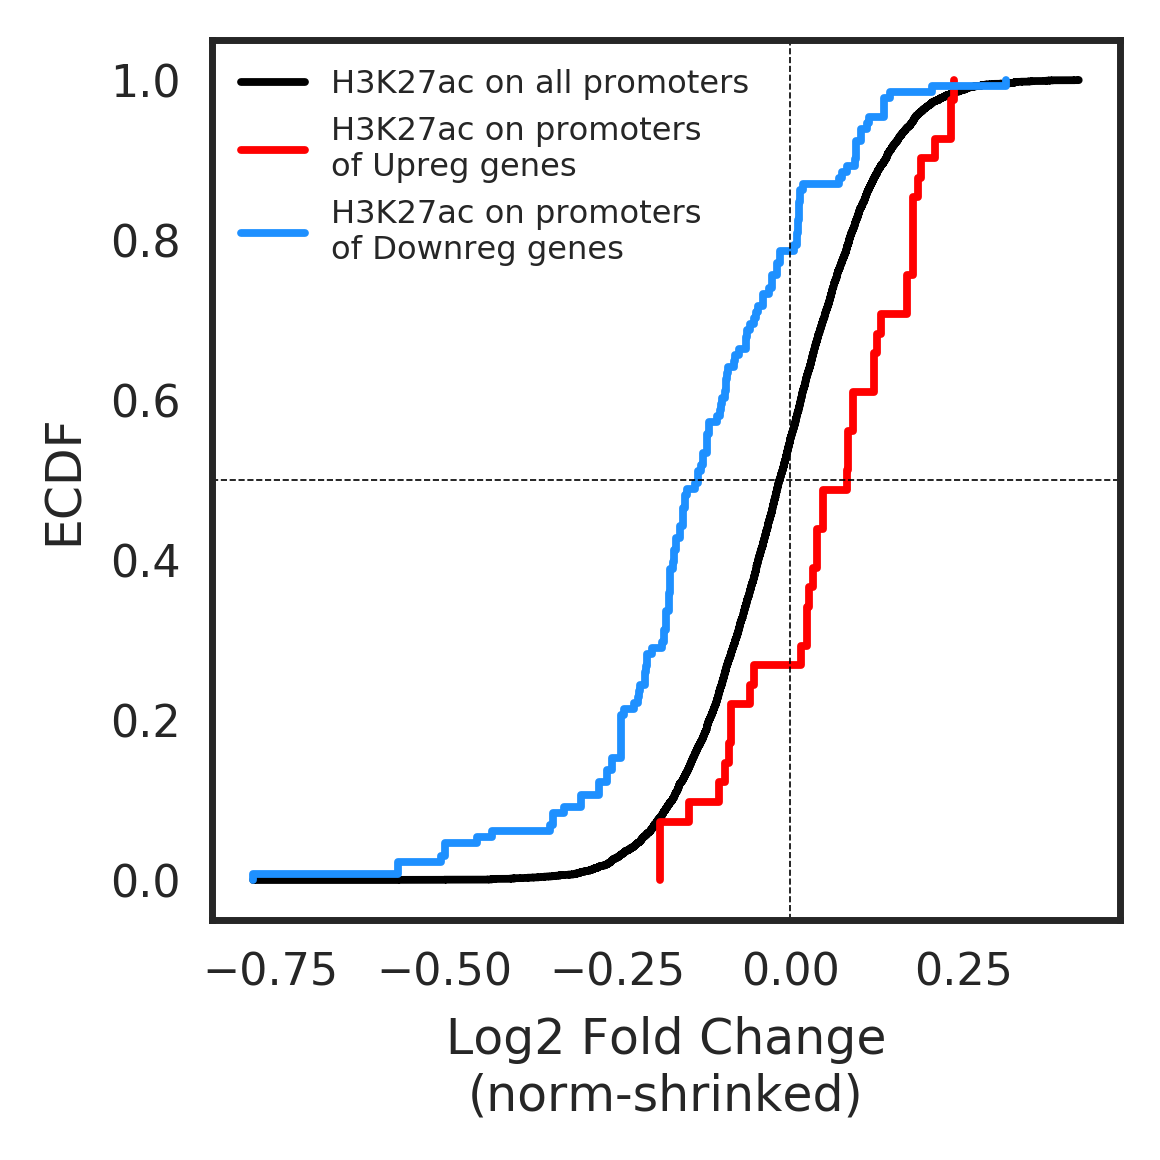

In [6]:
### with cumulative distributions
plt.figure(dpi=400,figsize=(3,3))

data = df.log2FoldChange_normal.dropna()
data_2 = df.log2FoldChange_normal.loc[exp_de_npc_up].dropna()
data_3 = df.log2FoldChange_normal.loc[exp_de_npc_down].dropna()

levels = np.linspace(0, 1, len(data) + 1)  # endpoint 1 is included by default
levels_2 = np.linspace(0, 1, len(data_2) + 1)
levels_3 = np.linspace(0, 1, len(data_3) + 1)

plt.step(sorted(list(data) + [max(data)]), levels, color="k", label = "H3K27ac on all promoters")
plt.step(sorted(list(data_2) + [max(data_2)]), levels_2, color="r", label = "H3K27ac on promoters\nof Upreg genes")
plt.step(sorted(list(data_3) + [max(data_3)]), levels_3, color="dodgerblue", label = "H3K27ac on promoters\nof Downreg genes")
plt.axhline(0.5, linestyle='--',linewidth=0.3,color='k')
plt.axvline(0,linestyle='--',linewidth=0.3,color='k')
plt.legend(fontsize="xx-small")
# plt.title("H3K27ac")
plt.xlabel("Log2 Fold Change\n(norm-shrinked)")
plt.ylabel("ECDF")
plt.tight_layout()

plt.savefig("../FIGURES/H3K27ac_ECDF_NPC48h.png")

# mESC

In [7]:
exp_de_esc = pd.read_csv("../INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_mESC_EPZvsDMSO.tsv", sep="\t")
exp_de_esc_up = exp_de_esc.loc[(exp_de_esc.padj<0.05)&(exp_de_esc.log2FoldChange>0)].index
exp_de_esc_down = exp_de_esc.loc[(exp_de_esc.padj<0.05)&(exp_de_esc.log2FoldChange<0)].index

In [8]:
peaks_esc = pd.read_csv("../INTERMEDIATE_FILES/mESC_DIFF_H3K4me3/REFERENCE_TABLE_H3K4me3.bed",sep="\t")
de_peaks_esc = pd.read_csv("../INTERMEDIATE_FILES/mESC_DIFF_H3K4me3/resLFC_normal.tsv",sep="\t")
de_peaks_esc.columns = ["{}_normal".format(i) for i in list(de_peaks_esc)]
de_peaks_esc = de_peaks_esc[["log2FoldChange_normal"]]
df = peaks_esc.merge(de_peaks_esc, how='right',left_on="peakID", right_index=True)
df = df.loc[df.Annotation_homer == "promoter-TSS"]
df.index = df.homer_genes
df

,chr,start,end,peakID,baseMean,log2FoldChange,pvalue,padj,geneID,symbol,Annotation_homer,homer_genes,log2FoldChange_normal
homer_genes,,,,,,,,,,,,,
ENSMUSG00000051451.6,7,90442047,90446954,7_90442047_90446954,722.889280,-2.262109e-06,0.707620,0.999974,ENSMUSG00000051451.6,Crebzf,promoter-TSS,ENSMUSG00000051451.6,-0.031154
ENSMUSG00000023018.5,15,99701365,99703765,15_99701365_99703765,440.260274,-3.603484e-06,0.593832,0.999974,ENSMUSG00000023018.5,Smarcd1,promoter-TSS,ENSMUSG00000023018.5,-0.044452
ENSMUSG00000023018.5,15,99701365,99703765,15_99701365_99703765,440.260274,-3.603484e-06,0.593832,0.999974,ENSMUSG00000023017.10,Asic1,promoter-TSS,ENSMUSG00000023018.5,-0.044452
ENSMUSG00000023018.5,15,99701365,99703765,15_99701365_99703765,440.260274,-3.603484e-06,0.593832,0.999974,ENSMUSG00000116250.1,RP24-258K6.9,promoter-TSS,ENSMUSG00000023018.5,-0.044452
ENSMUSG00000023018.5,15,99701365,99703765,15_99701365_99703765,440.260274,-3.603484e-06,0.593832,0.999974,ENSMUSG00000091604.2,Gm17349,promoter-TSS,ENSMUSG00000023018.5,-0.044452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000017453.4,11,77884682,77885348,11_77884682_77885348,74.055162,2.525779e-06,0.408289,0.999974,ENSMUSG00000017453.4,Pipox,promoter-TSS,ENSMUSG00000017453.4,-0.042803
ENSMUSG00000061613.12,17,31658997,31659495,17_31658997_31659495,87.367565,2.859116e-07,0.909581,0.999974,ENSMUSG00000061613.12,U2af1,promoter-TSS,ENSMUSG00000061613.12,0.002806
ENSMUSG00000036578.7,7,31049640,31053959,7_31049640_31053959,449.888292,3.175088e-06,0.546894,0.999974,ENSMUSG00000036570.14,Fxyd1,promoter-TSS,ENSMUSG00000036578.7,0.053695


/package/anaconda3/bin/ipython:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  import IPython
/package/anaconda3/bin/ipython:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


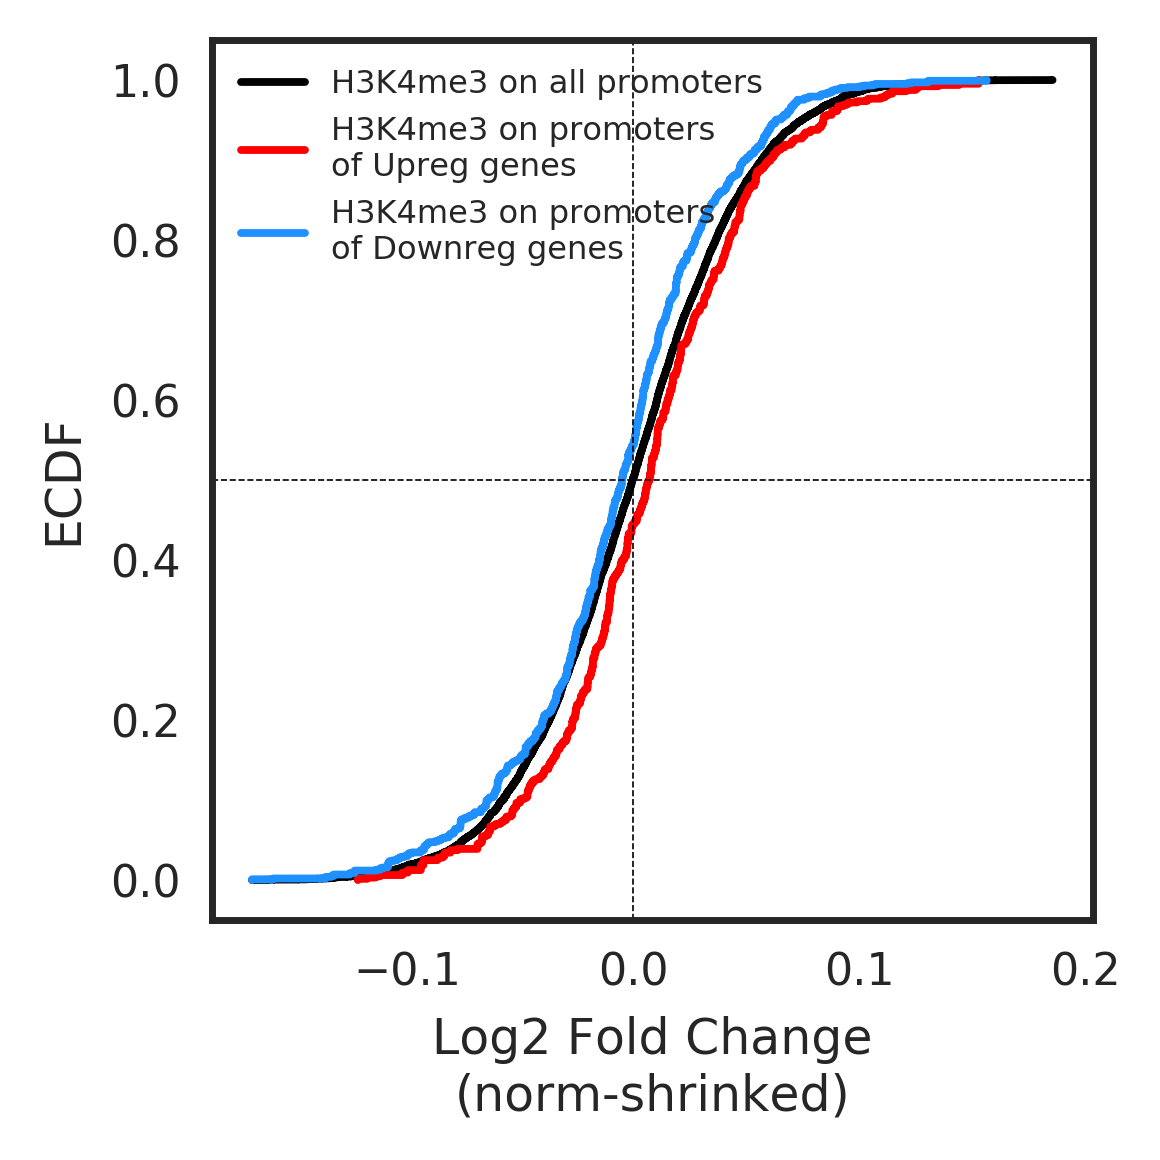

In [9]:
plt.figure(dpi=400,figsize=(3,3))

data = df.log2FoldChange_normal.dropna()
data_2 = df.log2FoldChange_normal.loc[exp_de_esc_up].dropna()
data_3 = df.log2FoldChange_normal.loc[exp_de_esc_down].dropna()

levels = np.linspace(0, 1, len(data) + 1)  # endpoint 1 is included by default
levels_2 = np.linspace(0, 1, len(data_2) + 1)
levels_3 = np.linspace(0, 1, len(data_3) + 1)

plt.step(sorted(list(data) + [max(data)]), levels, color="k", label = "H3K4me3 on all promoters")
plt.step(sorted(list(data_2) + [max(data_2)]), levels_2, color="r", label = "H3K4me3 on promoters\nof Upreg genes")
plt.step(sorted(list(data_3) + [max(data_3)]), levels_3, color="dodgerblue", label = "H3K4me3 on promoters\nof Downreg genes")
plt.axhline(0.5, linestyle='--',linewidth=0.3,color='k')
plt.axvline(0,linestyle='--',linewidth=0.3,color='k')
plt.legend(fontsize="xx-small", loc=2)
# plt.title("H3K4me3")
plt.xlabel("Log2 Fold Change\n(norm-shrinked)")
plt.ylabel("ECDF")
plt.tight_layout()

plt.savefig("../FIGURES/H3K4me3_ECDF_mESC.png")

In [10]:
peaks_esc = pd.read_csv("../INTERMEDIATE_FILES/mESC_DIFF_H3K27ac/REFERENCE_TABLE_H3K27ac.bed",sep="\t")
de_peaks_esc = pd.read_csv("../INTERMEDIATE_FILES/mESC_DIFF_H3K27ac/resLFC_normal.tsv",sep="\t")
de_peaks_esc.columns = ["{}_normal".format(i) for i in list(de_peaks_esc)]
de_peaks_esc = de_peaks_esc[["log2FoldChange_normal"]]
df = peaks_esc.merge(de_peaks_esc, how='right',left_on="peakID", right_index=True)
df = df.loc[df.Annotation_homer == "promoter-TSS"]
df.index = df.homer_genes
df

,chr,start,end,peakID,baseMean,log2FoldChange,pvalue,padj,geneID,symbol,Annotation_homer,homer_genes,log2FoldChange_normal
homer_genes,,,,,,,,,,,,,
ENSMUSG00000070002.7,8,70537897,70540878,8_70537897_70540878,1185.578421,2.938660e-06,0.717534,0.999948,ENSMUSG00000070002.7,Ell,promoter-TSS,ENSMUSG00000070002.7,0.027944
ENSMUSG00000027519.10,2,173658879,173659495,2_173658879_173659495,157.939374,-3.107178e-06,0.836146,0.999948,ENSMUSG00000055897.13,Ppp4r1l-ps,promoter-TSS,ENSMUSG00000027519.10,0.013362
ENSMUSG00000027519.10,2,173658879,173659495,2_173658879_173659495,157.939374,-3.107178e-06,0.836146,0.999948,ENSMUSG00000027519.10,Rab22a,promoter-TSS,ENSMUSG00000027519.10,0.013362
ENSMUSG00000028571.15,4,96077673,96078044,4_96077673_96078044,57.445350,2.485328e-06,0.197976,0.999948,ENSMUSG00000028571.15,Cyp2j13,promoter-TSS,ENSMUSG00000028571.15,0.054339
ENSMUSG00000085862.2,2,50295609,50297289,2_50295609_50297289,353.368538,-3.190137e-06,0.734031,0.999948,ENSMUSG00000026766.16,Mmadhc,promoter-TSS,ENSMUSG00000085862.2,-0.025147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000071550.14,16,44394096,44394725,16_44394096_44394725,128.354844,-1.433293e-06,0.976406,0.999948,ENSMUSG00000071550.14,Cfap44,promoter-TSS,ENSMUSG00000071550.14,0.003200
ENSMUSG00000090509.2,17,35600739,35602573,17_35600739_35602573,364.528653,-7.626625e-07,0.873224,0.999948,ENSMUSG00000090509.2,Sfta2,promoter-TSS,ENSMUSG00000090509.2,-0.012359
ENSMUSG00000038323.3,1,57376781,57377465,1_57376781_57377465,305.312216,8.196374e-09,0.999850,0.999948,ENSMUSG00000097519.2,RP24-77I21.2,promoter-TSS,ENSMUSG00000038323.3,-0.000177


/package/anaconda3/bin/ipython:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  import IPython
/package/anaconda3/bin/ipython:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


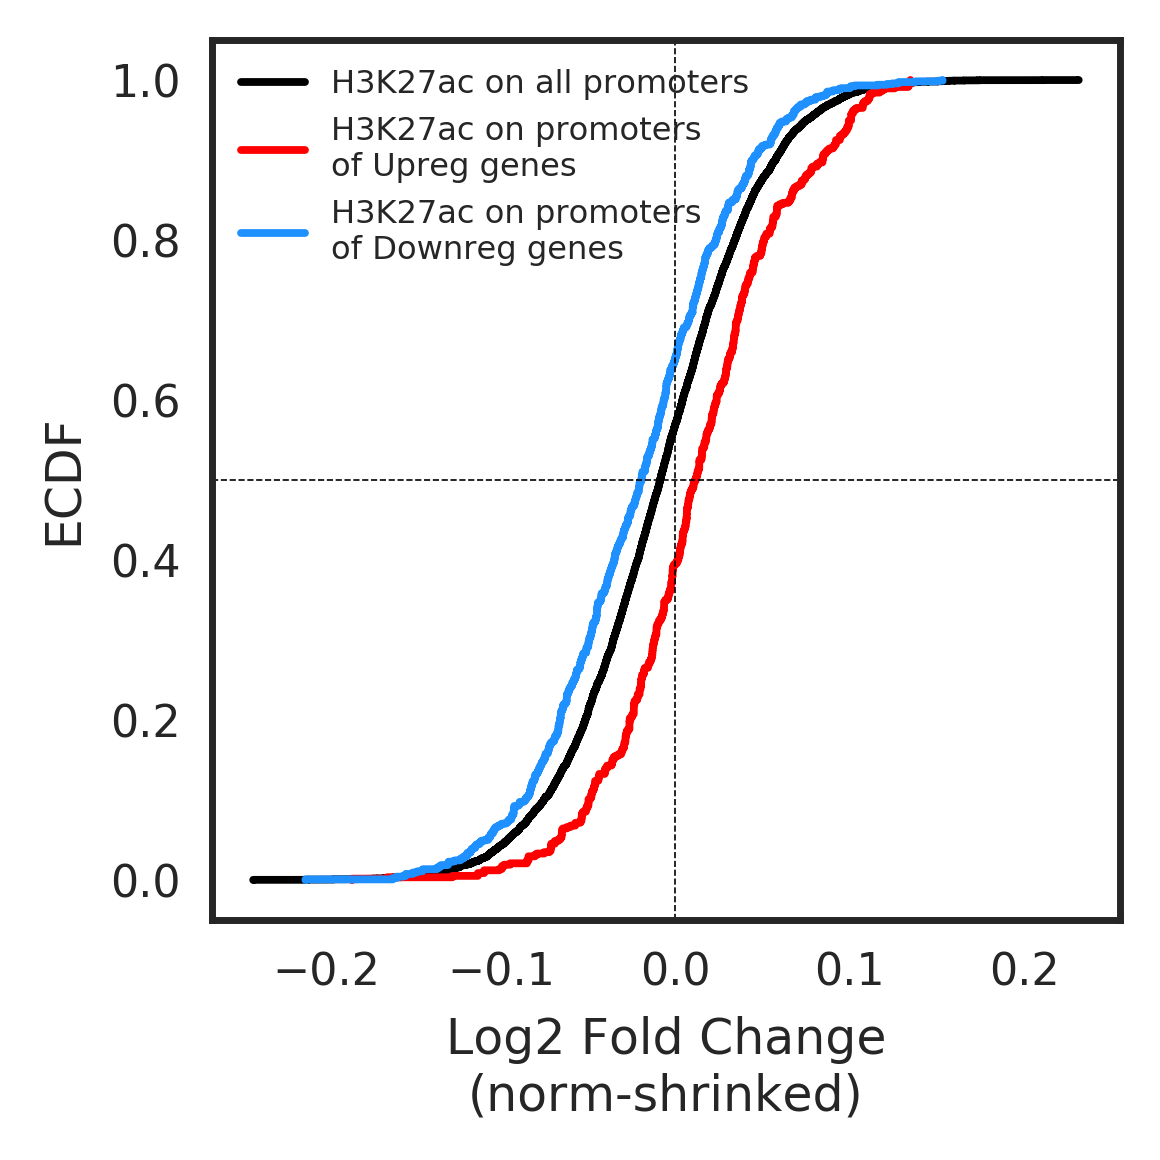

In [11]:
plt.figure(dpi=400,figsize=(3,3))

data = df.log2FoldChange_normal.dropna()
data_2 = df.log2FoldChange_normal.loc[exp_de_esc_up].dropna()
data_3 = df.log2FoldChange_normal.loc[exp_de_esc_down].dropna()

levels = np.linspace(0, 1, len(data) + 1)  # endpoint 1 is included by default
levels_2 = np.linspace(0, 1, len(data_2) + 1)
levels_3 = np.linspace(0, 1, len(data_3) + 1)

plt.step(sorted(list(data) + [max(data)]), levels, color="k", label = "H3K27ac on all promoters")
plt.step(sorted(list(data_2) + [max(data_2)]), levels_2, color="r", label = "H3K27ac on promoters\nof Upreg genes")
plt.step(sorted(list(data_3) + [max(data_3)]), levels_3, color="dodgerblue", label = "H3K27ac on promoters\nof Downreg genes")
plt.axhline(0.5, linestyle='--',linewidth=0.3,color='k')
plt.axvline(0,linestyle='--',linewidth=0.3,color='k')
plt.legend(fontsize="xx-small", loc=2)
# plt.title("H3K27ac")
plt.xlabel("Log2 Fold Change\n(norm-shrinked)")
plt.ylabel("ECDF")
plt.tight_layout()

plt.savefig("../FIGURES/H3K27ac_ECDF_mESC.png")